In [1]:
%matplotlib inline

## Setup GPU Device

In [2]:
import os
#Set GPU IDs for training:
os.environ["CUDA_VISIBLE_DEVICES"] = '3'

In [3]:
import dgl
def build_circuit_graph_undirected(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    g.add_edges(dst, src)
    return g

def build_circuit_graph_directed_sd(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    return g

def build_circuit_graph_directed_ds(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(dst, src)
    return g

## Choose Number of Training Samples

In [4]:
import os
import matplotlib.pyplot as plt
import networkx as nx
import csv
import numpy as np
dir = 'training_data'

trainset=[]
labels=[]
#for filename in os.listdir(dir):
np.random.seed(0)
# training_idx = np.random.randint(4,64,10)
training_idx = np.random.choice(np.arange(4,64), size=1, replace=False)
print(training_idx)

[30]


## Prepare Training and Test Data

In [5]:
for idx in training_idx:
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(idx)+"bit"+j+'.csv'
        filename2 = "cla_"+str(idx)+"bit"+j+'.csv'
        filename3 = "csa_"+str(idx)+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(idx)+"bit"+j+'.csv'
        if(filename.find("node_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        
        if(filename3.find("node_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    #create dgl graph
    g=build_circuit_graph_undirected(node_list,edge_list)
    trainset.append(g)
    labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2,edge_list2)
    trainset.append(g2)
    labels.append(label_list2[0])
    g3=build_circuit_graph_undirected(node_list3,edge_list3)
    trainset.append(g3)
    labels.append(label_list3[0])
    g4=build_circuit_graph_undirected(node_list4,edge_list4)
    trainset.append(g4)
    labels.append(label_list4[0])

for i in labels:
    i[0] = int(i[0])

print(labels)

[[1], [0], [2], [3]]


## Visualize Training Data

In [6]:
# graph = trainset[14]
# label=labels[14][0]

# fig, ax = plt.subplots()
# G=graph.to_networkx()
# pos=nx.spring_layout(G)
# nx.draw(G,pos)
# nx.draw_networkx_labels(G,pos, ax=ax)
# ax.set_title('Class: {:f}'.format(label))
# plt.show()

## Apply random shuffle to training set

In [7]:
##apply random shuffle on the trainset
np.random.seed(0)
randomize = np.arange(len(trainset))
np.random.shuffle(randomize)
labels_shuffled=[]
trainset_shuffled=[]
for i in range (len(randomize)):
    labels_shuffled.append(labels[randomize[i]])
    trainset_shuffled.append(trainset[randomize[i]])

In [22]:
len(trainset_shuffled)

4

In [8]:
import dgl

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

In [9]:
import dgl.function as fn
import torch
import torch.nn as nn

# Sends a message of node feature h.
msg = fn.copy_src(src='h', out='m')

def reduce(nodes):
    """Take an average over all neighbor node features hu and use it to
    overwrite the original node feature."""
    accum = torch.mean(nodes.mailbox['m'], 1)
    return {'h': accum}

class NodeApplyModule(nn.Module):
    """Update the node feature hv with ReLU(Whv+b)."""
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.activation = activation

    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h' : h}

class GCN(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GCN, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)

    def forward(self, g, feature):
        # Initialize the node features with h.
        g.ndata['h'] = feature
        g.update_all(msg, reduce)
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')

## Readout and classification

In [10]:
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()

        self.layers = nn.ModuleList([
            GCN(in_dim, hidden_dim, F.relu),
            GCN(hidden_dim, hidden_dim, F.relu)])
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g):
        # For undirected graphs, in_degree is the same as
        # out_degree.
        h = g.in_degrees().view(-1, 1).float().cuda()
        for conv in self.layers:
            h = conv(g, h)
        g.ndata['h'] = h
        hg = dgl.mean_nodes(g, 'h')
        return self.classify(hg)

## Setup and training

In [11]:
import torch.optim as optim
from torch.utils.data import DataLoader

In [12]:
# Create model
#model = Classifier(1, 256, trainset.num_classes)
model = Classifier(1, 256, 4)
model.cuda()
loss_func = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()

labels_shuffled = torch.LongTensor(labels_shuffled).cuda()

epoch_losses = []
for epoch in range(500):
    model.train()
    epoch_loss = 0
    for iter, bg in enumerate(trainset_shuffled):
        prediction=torch.zeros(1,4,dtype=torch.float64).cuda()
        prediction[0] = model(bg)

        loss = loss_func(prediction, labels_shuffled[iter])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
    epoch_loss /= (iter + 1)
    print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses.append(epoch_loss)
    
#     if (epoch%5==0):
#         model.eval()
#         eval_bg = dgl.batch(trainset_shuffled)
#         eval_labels = torch.tensor(labels_shuffled).float().view(-1, 1)
#         probs_Y = torch.softmax(model(eval_bg), 1)
#         argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)

#         print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
#             (eval_labels == argmax_Y.float()).sum().item() / len(eval_labels) * 100))

Epoch 0, loss 2.0476
Epoch 1, loss 1.5272
Epoch 2, loss 1.3895
Epoch 3, loss 1.3652
Epoch 4, loss 1.4050
Epoch 5, loss 1.4347
Epoch 6, loss 1.4369
Epoch 7, loss 1.4268
Epoch 8, loss 1.4142
Epoch 9, loss 1.4015
Epoch 10, loss 1.3907
Epoch 11, loss 1.3849
Epoch 12, loss 1.3844
Epoch 13, loss 1.3860
Epoch 14, loss 1.3871
Epoch 15, loss 1.3859
Epoch 16, loss 1.3826
Epoch 17, loss 1.3779
Epoch 18, loss 1.3728
Epoch 19, loss 1.3680
Epoch 20, loss 1.3639
Epoch 21, loss 1.3604
Epoch 22, loss 1.3569
Epoch 23, loss 1.3530
Epoch 24, loss 1.3485
Epoch 25, loss 1.3435
Epoch 26, loss 1.3383
Epoch 27, loss 1.3329
Epoch 28, loss 1.3284
Epoch 29, loss 1.3213
Epoch 30, loss 1.3156
Epoch 31, loss 1.3099
Epoch 32, loss 1.3041
Epoch 33, loss 1.2983
Epoch 34, loss 1.2923
Epoch 35, loss 1.2862
Epoch 36, loss 1.2800
Epoch 37, loss 1.2739
Epoch 38, loss 1.2679
Epoch 39, loss 1.2620
Epoch 40, loss 1.2558
Epoch 41, loss 1.2498
Epoch 42, loss 1.2433
Epoch 43, loss 1.2372
Epoch 44, loss 1.2309
Epoch 45, loss 1.224

Epoch 362, loss 0.4186
Epoch 363, loss 0.4176
Epoch 364, loss 0.4166
Epoch 365, loss 0.4158
Epoch 366, loss 0.4148
Epoch 367, loss 0.4139
Epoch 368, loss 0.4131
Epoch 369, loss 0.4122
Epoch 370, loss 0.4114
Epoch 371, loss 0.4106
Epoch 372, loss 0.4097
Epoch 373, loss 0.4090
Epoch 374, loss 0.4080
Epoch 375, loss 0.4072
Epoch 376, loss 0.4066
Epoch 377, loss 0.4058
Epoch 378, loss 0.4047
Epoch 379, loss 0.4041
Epoch 380, loss 0.4034
Epoch 381, loss 0.4025
Epoch 382, loss 0.4018
Epoch 383, loss 0.4010
Epoch 384, loss 0.4002
Epoch 385, loss 0.3994
Epoch 386, loss 0.3988
Epoch 387, loss 0.3980
Epoch 388, loss 0.3971
Epoch 389, loss 0.3964
Epoch 390, loss 0.3958
Epoch 391, loss 0.3950
Epoch 392, loss 0.3942
Epoch 393, loss 0.3935
Epoch 394, loss 0.3927
Epoch 395, loss 0.3919
Epoch 396, loss 0.3912
Epoch 397, loss 0.3904
Epoch 398, loss 0.3896
Epoch 399, loss 0.3890
Epoch 400, loss 0.3883
Epoch 401, loss 0.3875
Epoch 402, loss 0.3869
Epoch 403, loss 0.3863
Epoch 404, loss 0.3855
Epoch 405, 

## Finish Training

## Plot Loss

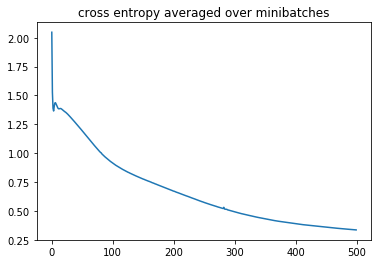

In [13]:
plt.title('cross entropy averaged over minibatches')
plt.plot(epoch_losses)
plt.show()

In [14]:
print(model.layers[0].apply_mod.linear.weight.size())
print(model.layers[1].apply_mod.linear.weight.size())
model.classify.weight.size()

torch.Size([256, 1])
torch.Size([256, 256])


torch.Size([4, 256])

## Get Testset data

In [15]:
testset = []
test_labels = []
test_dir = 'test_data'

testing_idx=[]
for i in range(4,65):
    if i not in training_idx:
        testing_idx.append(i)

print(testing_idx)
print(training_idx)

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
[30]


In [16]:
for idx in testing_idx:
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(idx)+"bit"+j+'.csv'
        filename2 = "cla_"+str(idx)+"bit"+j+'.csv'
        filename3 = "csa_"+str(idx)+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(idx)+"bit"+j+'.csv'
        
        if(filename.find("node_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        if(filename3.find("node_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    #create dgl graph
    g=build_circuit_graph_undirected(node_list,edge_list)
    testset.append(g)
    test_labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2,edge_list2)
    testset.append(g2)
    test_labels.append(label_list2[0])
    g3=build_circuit_graph_undirected(node_list3,edge_list3)
    testset.append(g3)
    test_labels.append(label_list3[0])
    g4=build_circuit_graph_undirected(node_list4,edge_list4)
    testset.append(g4)
    test_labels.append(label_list4[0])

for i in test_labels:
    i[0] = int(i[0])

print(test_labels)

[[1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3],

In [17]:
##apply random shuffle on the testset    
np.random.seed(0)
randomize = np.arange(len(testset))
np.random.shuffle(randomize)
testset_shuffled=[]
test_labels_shuffled=[]
for i in range (len(randomize)):
    test_labels_shuffled.append(test_labels[randomize[i]])
    testset_shuffled.append(testset[randomize[i]])

In [18]:
model.eval()
test_bg = dgl.batch(testset_shuffled)
test_labels = torch.tensor(test_labels_shuffled).float().view(-1, 1).cuda()
probs_Y = torch.softmax(model(test_bg), 1)


sampled_Y = torch.multinomial(probs_Y, 1)
argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)
print('Accuracy of sampled predictions on the test set: {:.4f}%'.format(
    (test_labels == sampled_Y.float()).sum().item() / len(test_labels) * 100))
print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
    (test_labels == argmax_Y.float()).sum().item() / len(test_labels) * 100))

zip(model(test_bg),(test_labels))
for i1,i2 in zip(probs_Y,(test_labels)):
    print(i1,i2)
# print(torch.max(probs_Y, 1))

Accuracy of sampled predictions on the test set: 72.0833%
Accuracy of argmax predictions on the test set: 99.166667%
tensor([0.5766, 0.0155, 0.0030, 0.4049], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([0.], device='cuda:0')
tensor([0.4063, 0.0647, 0.0016, 0.5275], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([0.5589, 0.0191, 0.0028, 0.4191], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([0.], device='cuda:0')
tensor([8.4812e-03, 3.6461e-13, 9.9128e-01, 2.3506e-04], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')
tensor([1.3904e-02, 9.2715e-01, 3.8333e-06, 5.8938e-02], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([1.], device='cuda:0')
tensor([0.4602, 0.0298, 0.0026, 0.5074], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([1.4345e-02, 9.2486e-01, 4.0410e-06, 6.0787e-02], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([1.], devic

       grad_fn=<SelectBackward>) tensor([1.], device='cuda:0')
tensor([1.1549e-03, 3.1870e-16, 9.9883e-01, 1.1517e-05], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')
tensor([1.4121e-02, 9.2603e-01, 3.9347e-06, 5.9846e-02], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([1.], device='cuda:0')
tensor([2.7396e-01, 7.2639e-08, 6.8722e-01, 3.8820e-02], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')
tensor([1.1231e-02, 9.4107e-01, 2.6743e-06, 4.7702e-02], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([1.], device='cuda:0')
tensor([0.4443, 0.0374, 0.0023, 0.5160], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([2.7800e-03, 8.2453e-15, 9.9717e-01, 4.5895e-05], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')
tensor([0.4394, 0.0402, 0.0022, 0.5182], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([0.

In [19]:
import tsne

#m = trainset[0].adjacency_matrix()
m = model(test_bg).cpu().data.numpy()


In [20]:
Y = tsne.tsne(m, 2, 30)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 240...
Mean value of sigma: 1.010117
Iteration 10: error is 10.537612
Iteration 20: error is 8.502115
Iteration 30: error is 8.627261
Iteration 40: error is 8.441665
Iteration 50: error is 8.159140
Iteration 60: error is 8.011606
Iteration 70: error is 8.023462
Iteration 80: error is 8.130352
Iteration 90: error is 8.338701
Iteration 100: error is 8.384973
Iteration 110: error is 0.682639
Iteration 120: error is 0.266293
Iteration 130: error is 0.126303
Iteration 140: error is 0.096023
Iteration 150: error is 0.088650
Iteration 160: error is 0.084749
Iteration 170: error is 0.081428
Iteration 180: error is 0.077846
Iteration 190: error is 0.074358
Iteration 200: error is 0.071663
Iteration 210: error is 0.069701
Iteration 220: error is 0.068159
Iteration 230: error is 0.066946
Iteration 240: error is 0.066020
Iteration 250: error is 0.065214
Iteration 260: error is 0.064499
Iteration 2

In [20]:
print(Y)

[[-1.02352454e+01 -3.84557680e-02]
 [-1.01451649e+01  7.19844723e-02]
 [-1.87930405e+01 -8.10323209e+00]
 [-3.35731767e-01  1.48561669e+01]
 [ 2.63791595e+01 -1.02660576e+01]
 [-9.93710813e+00  7.69938548e-01]
 [-1.68173427e+01 -6.37533000e+00]
 [-1.72706610e+01 -6.69133892e+00]
 [-1.05509402e+01 -2.88904256e-01]
 [-1.85318422e+01 -8.36188742e+00]
 [ 2.41495709e+01 -1.17699458e+01]
 [ 2.76115433e+01 -9.37824324e+00]
 [ 1.30815794e+00  1.71598594e+01]
 [-1.98200197e+01 -9.38695632e+00]
 [ 1.85824737e+00  1.85263028e+01]
 [-8.09346920e-01  1.41369421e+01]
 [-9.63339990e+00  9.79532853e-01]
 [ 2.57263700e+01 -1.06751567e+01]
 [-9.15212191e+00  1.39810223e+00]
 [ 2.74999176e+01 -9.52086598e+00]
 [-1.85317571e+01 -8.36207168e+00]
 [ 2.36212411e+01 -1.11560715e+01]
 [-1.71305422e+01 -6.83079460e+00]
 [-1.98200868e+01 -9.38700875e+00]
 [-9.77821966e+00  5.62652805e-01]
 [-1.58407005e+01 -5.39970608e+00]
 [-9.11480954e+00  1.45797129e+00]
 [-1.05636429e+01  2.87852137e-01]
 [-6.90883778e-02  1

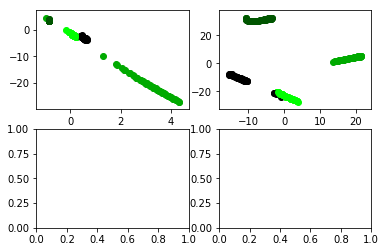

In [21]:
fig, axs = plt.subplots(2,2)

color = test_labels.cpu()*85/255
for i in range (len(test_labels)):
    axs[0,0].scatter(m[i,0],m[i,1],color=(0,color[i],0))
    axs[0,1].scatter(Y[i,0],Y[i,1],color=(0,color[i],0))
  
plt.show()

## End